In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from lutils import openf, writef
from tqdm import tqdm

import sys

sys.path.append("../src")

from tools.visualize import visualize_video

### Load data


In [2]:
df = pd.read_csv("../annotation/webvid-covr/webvid2m-covr_train.csv")

vid_dir = Path("../datasets/WebVid/2M/train")
vid_pths = list(vid_dir.glob("*/*.mp4"))
id2pth = {pth.parent.name + "/" + pth.stem: pth for pth in vid_pths}

### Filter out videos not found in the dataset


In [3]:
df = df[df["pth1"].isin(id2pth)]
df = df[df["pth2"].isin(id2pth)]
df.reset_index(inplace=True, drop=True)

### Visualize


txt1: Water stream


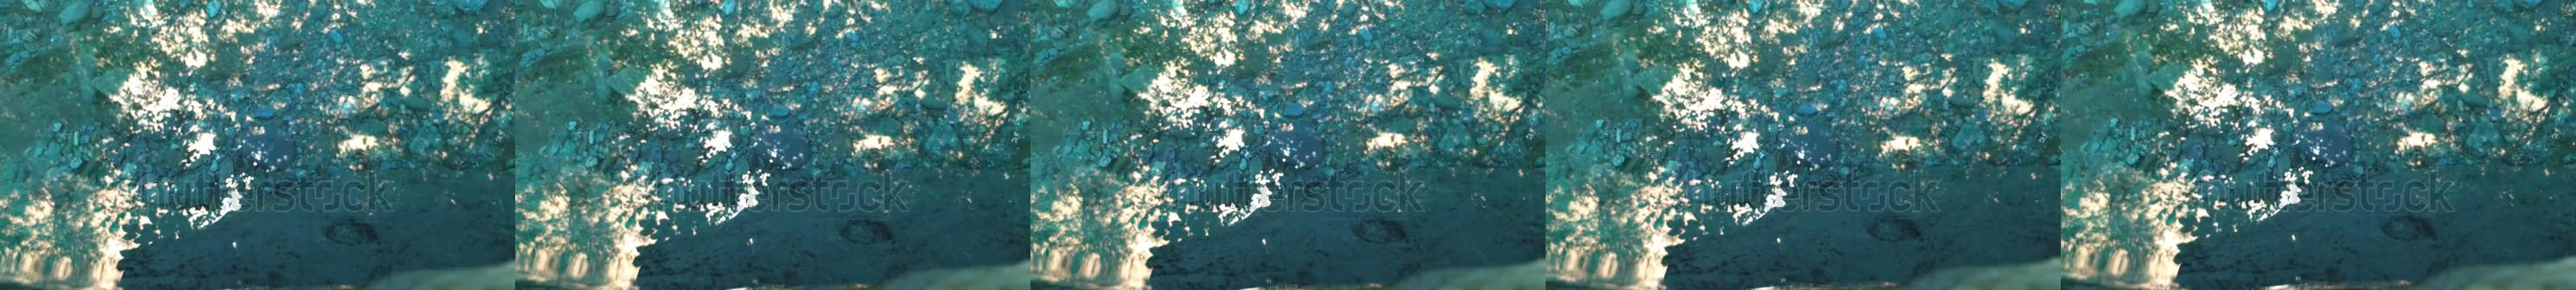

txt2: Water leakage.


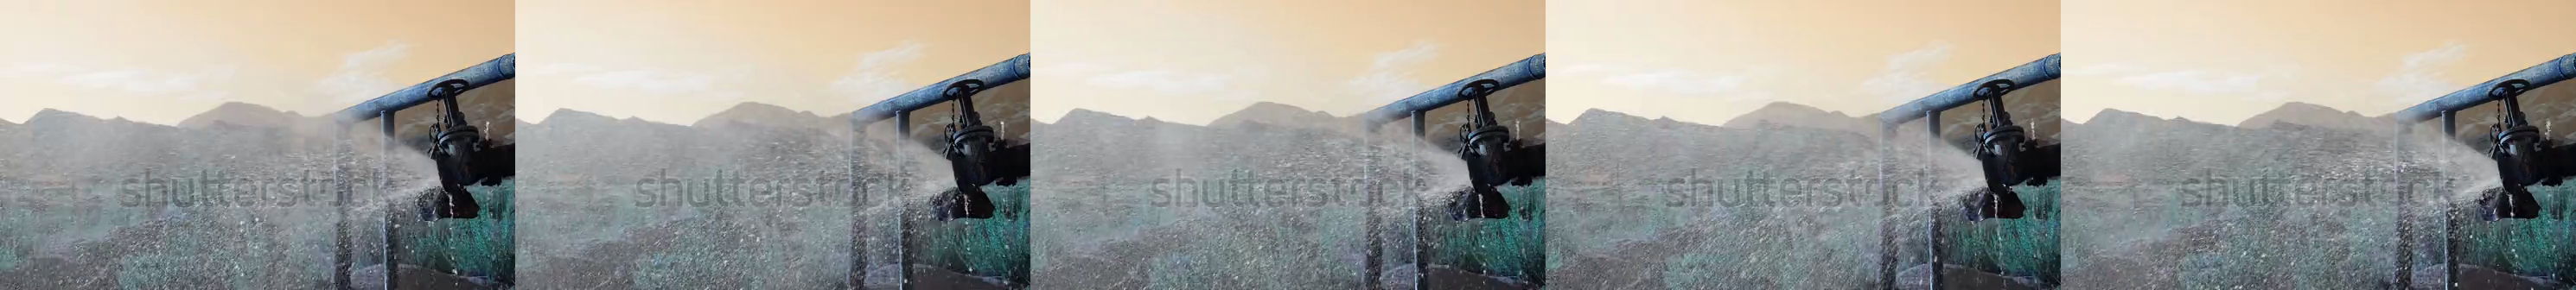

edit: Have the water be a leak


In [11]:
triplet = df.sample()

pth1 = id2pth[triplet["pth1"].values[0]]
pth2 = id2pth[triplet["pth2"].values[0]]
txt1 = triplet["txt1"].values[0]
txt2 = triplet["txt2"].values[0]
edit = triplet["edit"].values[0]

print(f"txt1: {txt1}")
display(visualize_video(pth1, n_frames=5))

print(f"txt2: {txt2}")
display(visualize_video(pth2, n_frames=5))

print(f"edit: {edit}")